In [1]:
import tensorflow as tf
import numpy as np

In [2]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 # create a y value which is approximately linear but with some random noise

In [3]:
X = tf.placeholder("float") # create symbolic variables
Y = tf.placeholder("float")

def model(X, w):
    return tf.multiply(X, w) # lr is just X*w so this model line is pretty simple

w = tf.Variable(0.0, name="weights") # create a shared variable (like theano.shared) for the weight matrix
y_model = model(X, w)

cost = tf.square(Y - y_model) # use square error for cost function

train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost) # construct an optimizer to minimize cost and fit line to my data

In [5]:
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize variables (in this case just variable W)
    tf.global_variables_initializer().run()

    for i in range(100):
        for (x, y) in zip(trX, trY):
            sess.run(train_op, feed_dict={X: x, Y: y})

    print(sess.run(w))  # It should be something around 2

2.00863


/Anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Epoch: 0050 cost= 0.077020995 W= 0.252906 b= 0.777639
Epoch: 0100 cost= 0.077017248 W= 0.252709 b= 0.779057
Epoch: 0150 cost= 0.077013910 W= 0.252523 b= 0.78039
Epoch: 0200 cost= 0.077010997 W= 0.252349 b= 0.781645
Epoch: 0250 cost= 0.077008426 W= 0.252185 b= 0.782825
Epoch: 0300 cost= 0.077006161 W= 0.25203 b= 0.783937
Epoch: 0350 cost= 0.077004179 W= 0.251885 b= 0.784981
Epoch: 0400 cost= 0.077002458 W= 0.251749 b= 0.785962
Epoch: 0450 cost= 0.077000916 W= 0.251621 b= 0.786882
Epoch: 0500 cost= 0.076999560 W= 0.251501 b= 0.787748
Epoch: 0550 cost= 0.076998405 W= 0.251387 b= 0.788563
Epoch: 0600 cost= 0.076997377 W= 0.251281 b= 0.789328
Epoch: 0650 cost= 0.076996468 W= 0.251181 b= 0.79005
Epoch: 0700 cost= 0.076995671 W= 0.251086 b= 0.790728
Epoch: 0750 cost= 0.076995000 W= 0.250997 b= 0.791367
Epoch: 0800 cost= 0.076994389 W= 0.250914 b= 0.791966
Epoch: 0850 cost= 0.076993875 W= 0.250836 b= 0.79253
Epoch: 0900 cost= 0.076993406 W= 0.250762 b= 0.793058
Epoch: 0950 cost= 0.076993003 W=

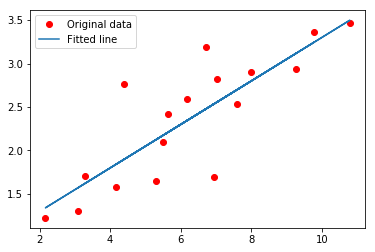

Testing... (Mean square loss Comparison)
Testing cost= 0.0789083
Absolute mean square loss difference: 0.00191565


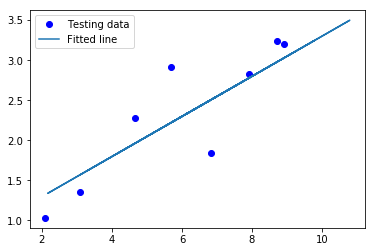

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
plt.show()